### Result Visulization for SAEA For CNN Hyperparameter Optimization

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
# load fully trained populations
with open('results/fully_trained_population.pkl', 'rb') as f:
    fully_trained_populations = pickle.load(f)

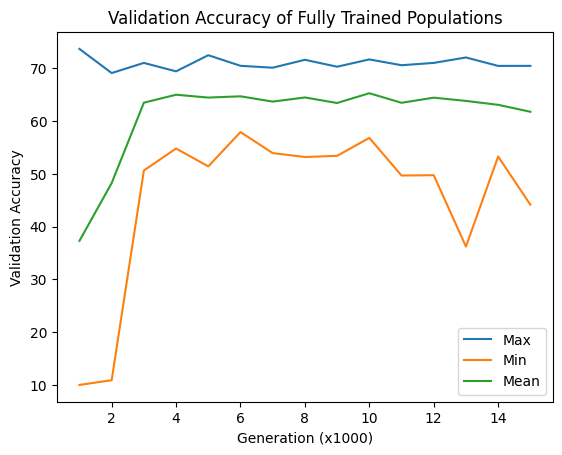

In [3]:
# plot the mean, max, and min of validation accuracies for each generation
x = range(1, len(fully_trained_populations) + 1)
validation_means = []
validation_maxes = []
validation_mins = []
for pop in fully_trained_populations:
    valid_acc = [genome.valid_acc for genome in pop]
    validation_means.append(np.mean(valid_acc))
    validation_maxes.append(np.max(valid_acc))
    validation_mins.append(np.min(valid_acc))

plt.plot(x, validation_maxes)
plt.plot(x, validation_mins)
plt.plot(x, validation_means)
plt.xlabel('Generation (x1000)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy of Fully Trained Populations')
plt.legend(['Max', 'Min', 'Mean'])

plt.show()




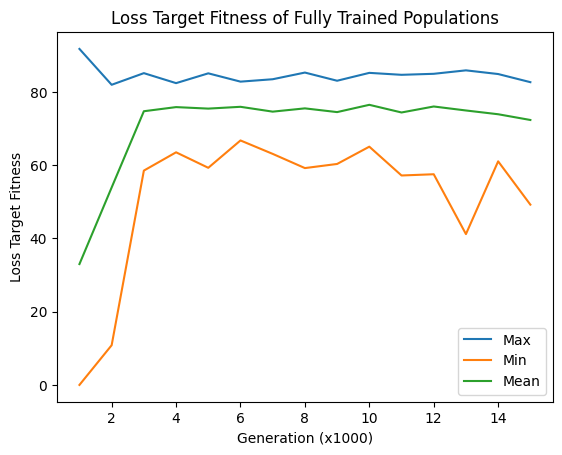

In [4]:
# plot the mean, max, and min of loss target fitness for each generation
x = range(1, len(fully_trained_populations) + 1)
loss_target_means = []
loss_target_maxes = []
loss_target_mins = []
for pop in fully_trained_populations:
    loss_target = [genome.loss_target_fitness for genome in pop]
    loss_target_means.append(np.mean(loss_target))
    loss_target_maxes.append(np.max(loss_target))
    loss_target_mins.append(np.min(loss_target))

plt.plot(x, loss_target_maxes)
plt.plot(x, loss_target_mins)
plt.plot(x, loss_target_means)
plt.xlabel('Generation (x1000)')
plt.ylabel('Loss Target Fitness')
plt.title('Loss Target Fitness of Fully Trained Populations')
plt.legend(['Max', 'Min', 'Mean'])

plt.show()


In [5]:
# load generational statistics
with open('results/generational_stats.pkl', 'rb') as f:
    generational_statistics = pickle.load(f)

generational_valid_acc_max = generational_statistics[0]
generational_valid_acc_min = generational_statistics[1]
generational_valid_acc_mean = generational_statistics[2]
generational_loss_target_max = generational_statistics[3]
generational_loss_target_min = generational_statistics[4]
generational_loss_target_mean = generational_statistics[5]
generational_pareto_fronts = generational_statistics[6]
generational_diversity = generational_statistics[7]
generational_surrogate_mae = generational_statistics[8]

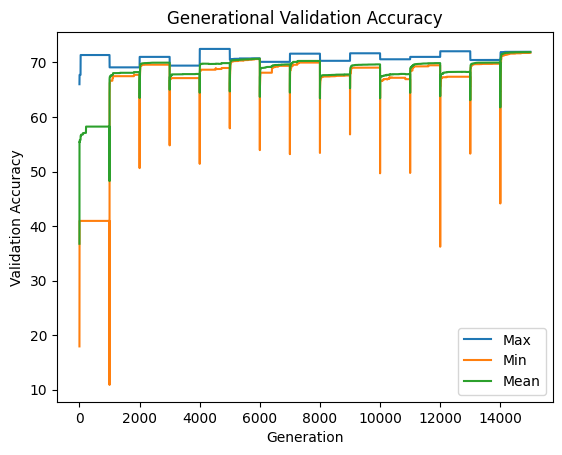

In [6]:
# plot generational validation accuracy max, min, and mean
x = range(1, len(generational_valid_acc_max) + 1)
plt.plot(x, generational_valid_acc_max)
plt.plot(x, generational_valid_acc_min)
plt.plot(x, generational_valid_acc_mean)
plt.xlabel('Generation')
plt.ylabel('Validation Accuracy')
plt.title('Generational Validation Accuracy')
plt.legend(['Max', 'Min', 'Mean'])
